In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.svm import SVC
from scipy import stats

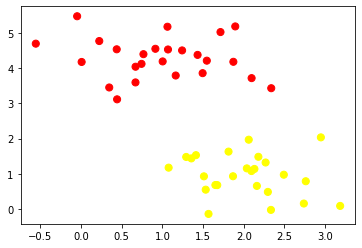

In [11]:
# Make Data for example
x, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.6)
plt.scatter(x[:,0], x[:, 1], c=y, s=50 , cmap='autumn')

(-1.0, 3.5)

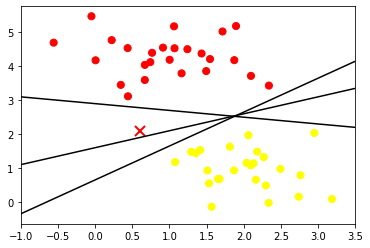

In [16]:
# Simple Bayesian classification 
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:,0], x[:, 1], c=y, s=50 , cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

(-1.0, 3.5)

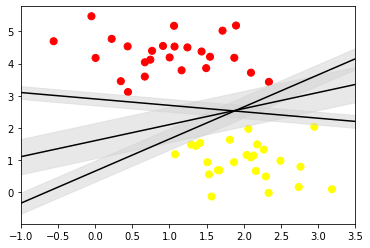

In [25]:
# SVM : Maximizing the Margin
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:,0], x[:, 1], c=y, s=50 , cmap='autumn')

for m, b, d in [(1, 0.65, 0.33),(0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m* xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)

<function numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)>

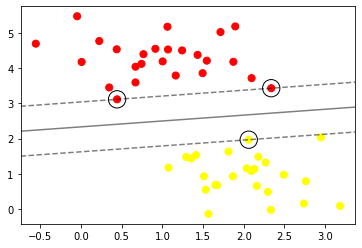

In [54]:
# Fitting a Support Vector Machine
# Simple 2D Support Vector Machine 
model = SVC(kernel='linear', C=1e10)
model.fit(x, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
     
    if ax is None: 
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model 
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    #plot support vectors
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,
                   edgecolors='black', facecolors='none')

        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
    
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

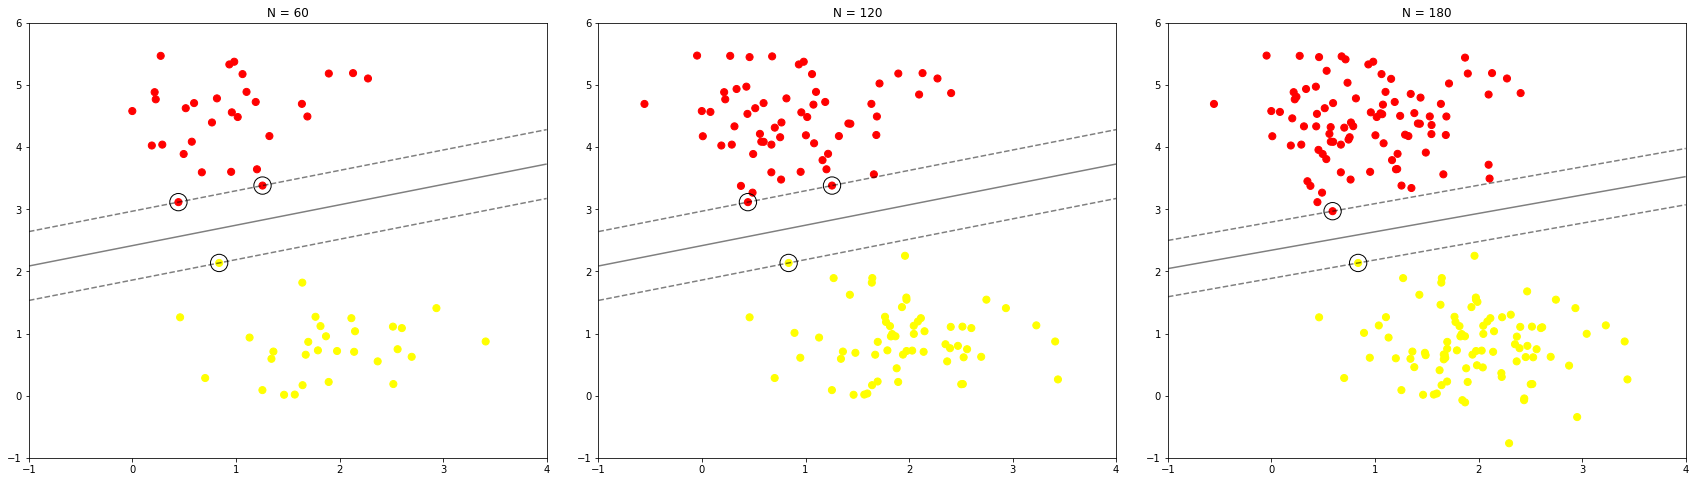

In [71]:
def plot_svm(N=10, ax=None): 
    x, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = x[:N]
    Y = y[:N]
    model = SVC(kernel='linear', C=1e10)
    model.fit(X, Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 3, figsize=(26, 8))
fig.subplots_adjust(left=0.065, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60,  120, 180]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

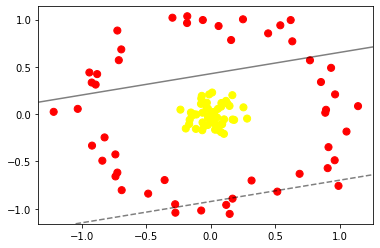

In [96]:
# Adaptive with Kernel SVM
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
